In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
os.getcwd()

'/Users/affan/Projects'

In [ ]:
os.chdir("./hortikultura-dss")

In [ ]:
os.getcwd()

'/Users/affan/Projects/hortikultura-dss'

In [ ]:
df = pd.read_csv("./data/all_rank.csv")
df.head()

,Unnamed: 0,kota,jenis_tanaman,pm_score,rank
0,0,Kota Uneng,Bayam,6.163795,1
1,1,Kota Uneng,Sawi,5.966614,2
2,2,Kota Uneng,Terung,5.586018,3
3,3,Kota Uneng,Kangkung,5.502105,4
4,4,Kota Uneng,Bawang Merah,5.478115,5


In [ ]:
df.iloc[:, 1:]

,kota,jenis_tanaman,pm_score,rank
0,Kota Uneng,Bayam,6.163795,1
1,Kota Uneng,Sawi,5.966614,2
2,Kota Uneng,Terung,5.586018,3
3,Kota Uneng,Kangkung,5.502105,4
4,Kota Uneng,Bawang Merah,5.478115,5
...,...,...,...,...
457,Wairbeler,Cabai Rawit,5.605238,10
458,Wairbeler,Cabai Merah,5.550899,11
459,Wairbeler,Kacang Panjang,5.415939,12
460,Wairbeler,Kentang,5.250849,13


In [ ]:
df.iloc[:, 1:].groupby("kota")

In [ ]:
df_group = df.iloc[:, 1:].groupby("kota")
df_group[df_group['rank'] <= 3]

TypeError: '<=' not supported between instances of 'SeriesGroupBy' and 'int'

In [ ]:
df_group['rank']

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
!pip install scikit-learn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached scikit_learn-1.4.2-cp39-cp39-macosx_10_9_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.13.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.4.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.4.2-cp39-cp39-macosx_10_9_x86_64.whl (11.6 MB)
Using cached joblib-1.4.0-py3-none-any.whl (301 kB)
Using cached scipy-1.13.0-cp39-cp39-macosx_10_9_x86_64.whl (39.3 MB)
Using cached threadpoolctl-3.4.0-py3-none-any.whl (17 kB)
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
y_predict = ["Bayam", "Sawi", "Terung"]
y_true = ["Bawang Merah", "Cabai Merah", "Terung"]

In [ ]:
confusion_matrix(y_true, y_predict)

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [ ]:
from skelarn.metrics import classification_report

ModuleNotFoundError: No module named 'skelarn'

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_true, y_predict)

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_clas

'              precision    recall  f1-score   support\n\nBawang Merah       0.00      0.00      0.00         1\n       Bayam       0.00      0.00      0.00         0\n Cabai Merah       0.00      0.00      0.00         1\n        Sawi       0.00      0.00      0.00         0\n      Terung       1.00      1.00      1.00         1\n\n    accuracy                           0.33         3\n   macro avg       0.20      0.20      0.20         3\nweighted avg       0.33      0.33      0.33         3\n'

In [ ]:
print(classification_report(y_true, y_predict))

              precision    recall  f1-score   support

Bawang Merah       0.00      0.00      0.00         1
       Bayam       0.00      0.00      0.00         0
 Cabai Merah       0.00      0.00      0.00         1
        Sawi       0.00      0.00      0.00         0
      Terung       1.00      1.00      1.00         1

    accuracy                           0.33         3
   macro avg       0.20      0.20      0.20         3
weighted avg       0.33      0.33      0.33         3



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_clas

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print(accuracy_score(y_true, y_predict))
print(f1_score(y_true, y_predict))
print(precision_score(y_true, y_predict))
print(recall_score(y_true, y_predict))

0.3333333333333333


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print(accuracy_score(y_true, y_predict))
# print(f1_score(y_true, y_predict))
print(precision_score(y_true, y_predict))
print(recall_score(y_true, y_predict))

0.3333333333333333


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
labels = ["Bayam","Sawi","Bawang Merah","Kangkung","Terung","Buncis","Brokoli","Kubis","Cabai Merah","Cabai Rawit","Tomat","Wortel","Kentang","Kacang Panjang"]
l2i = {v: k for k, v in enumerate(labels)}
l2i

{'Bayam': 0,
 'Sawi': 1,
 'Bawang Merah': 2,
 'Kangkung': 3,
 'Terung': 4,
 'Buncis': 5,
 'Brokoli': 6,
 'Kubis': 7,
 'Cabai Merah': 8,
 'Cabai Rawit': 9,
 'Tomat': 10,
 'Wortel': 11,
 'Kentang': 12,
 'Kacang Panjang': 13}

In [ ]:
i2l = {k: v for k, v in enumerate(labels)}
i2l

{0: 'Bayam',
 1: 'Sawi',
 2: 'Bawang Merah',
 3: 'Kangkung',
 4: 'Terung',
 5: 'Buncis',
 6: 'Brokoli',
 7: 'Kubis',
 8: 'Cabai Merah',
 9: 'Cabai Rawit',
 10: 'Tomat',
 11: 'Wortel',
 12: 'Kentang',
 13: 'Kacang Panjang'}

In [ ]:
y_predict

['Bayam', 'Sawi', 'Terung']

In [ ]:
y_predict_ = [l2i[i] for i in y_predict]
y_true_ = [l2i[i] for i in y_true]

y_predict_, y_true_

([0, 1, 4], [2, 8, 4])

In [ ]:
confusion_matrix(y_true_, y_predict_)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0]])

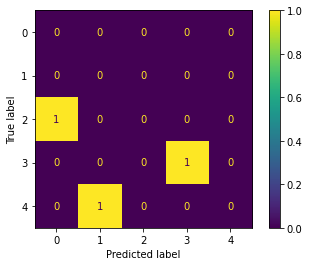

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_true_, y_predict_)).plot()